In [21]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import glob

def mplot(lon,lat,var):

    crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

    fig, ax = plt.subplots(nrows=1, figsize=(13, 20), constrained_layout=True,
                            subplot_kw={'projection': crs})
    fig.patch.set_facecolor('white')

    ax.contourf(lon,lat,var, transform=ccrs.PlateCarree())

    ax.set_extent([240., 285., 23.5, 49.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    

    return

import matplotlib.colors as colors

def gen_plot(lon, lat, var,title,ix):
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    import numpy as np

    crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

    fig, ax = plt.subplots(nrows=1, figsize=(7, 10), constrained_layout=False,
                            subplot_kw={'projection': crs})
    fig.patch.set_facecolor('white')

    # vvmax= [60,25,5,3]
    vvmax= [5000,5,1,2]
    vmin=0
    vmax=vvmax[ix]
    levels = np.linspace(vmin, vmax, 20 + 1)

    WhGrYlBu = colors.ListedColormap(['#ffffff', '#b7f6ff', '#70edff', '#29e4ff', '#00e1fb', '#0fffc6', '#3bffa4', '#68ff82', '#94ff60', '#c0ff3e', '#edff1c', '#fff400', '#ffc700', '#ff9b00', '#ff6e00', '#ff4200', '#ff1500', '#e80000', '#bb0000', '#8f0000'])

    var[var > vmax] = vmax 
    contourf_ = ax.contourf(lon[:],lat[:],var[:], transform=ccrs.PlateCarree(),levels=levels,vmin=vmin,vmax=vmax,cmap=WhGrYlBu)
    #contourf_ = ax.contourf(lon[:],lat[:],var[:], transform=ccrs.PlateCarree(),cmap=WhGrYlBu)


    ax.set_extent([240., 285., 23.75, 49.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.45)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)

    cbar = fig.colorbar(contourf_, pad=0.01,shrink=0.35)
    # cbar.set_label('(kg/ha)')
    # ax.set_title('Average NH3+NH4 dry deposition difference - 2016')
    # cbar.set_label(units)
    ax.set_title(title)
    #plt.savefig('images/Images_dif_AG_'+str(ix)+'.png',bbox_inches='tight', dpi = 300)
    return plt.show()

In [4]:
import netCDF4

coord = netCDF4.MFDataset('/mnt/raid/NEIC_2016_V1/simulations_output/2016v1_12US2/BF_NOAG/CAMx.12US2_BASE_BF.20160520.avrg.grd01.nc')
lat = coord.variables['latitude'][:]
lon = coord.variables['longitude'][:]

In [5]:
import netCDF4
import glob
## PT VARS ##
sec =[ 'cmv_c1c2_12','cmv_c3_12','pt_oilgas','ptegu','othpt','ptnonipm','ptfire_othna3d']

for ii in sec:
    print(ii)
    globals()['nh3_%s' % ii] =  netCDF4.MFDataset(glob.glob('/mnt/raid/CAMxemis/'+ii+'/ptsr.'+ii+'.201607*.12US2.nc'))

cmv_c1c2_12
cmv_c3_12
pt_oilgas
ptegu
othpt
ptnonipm
ptfire_othna3d


In [4]:
sec = ['On','On_nonUS']
# sec = ['On_nonUS']
for ii in sec:
    print(ii)
    # globals()['nh3_%s' % ii] = 
    globals()['nh3_g_%s' % ii] = xr.open_mfdataset('/mnt/raid/CAMxemis/Onroad/emis2d.'+ii+'.201607*.12US2.2016fh_16j.camx', combine='nested',concat_dim="TSTEP",
                    data_vars='minimal', coords='minimal', compat='override',engine='pseudonetcdf',drop_variables = ['HONO','CH4','PAR','ETHA','MEOH','ETOH','ETH','OLE','IOLE','ISOP','TERP','FORM','ALD2','ALDX','TOL','XYL','PRPA','ETHY','BENZ','BNZA','ACET','KET','NR','TOLA','XYLA','ISP','TRP','PCL','PNCOM','PAL','PCA','PFE','PMG','PK','PMN','PSI','PTI','FPRM'],
                    backend_kwargs={'format': 'uamiv'})
    
    


On
On_nonUS


In [5]:
sec = 'fertilizer'
nh3_g_fert = xr.open_mfdataset('/mnt/raid/CAMxemis/Fertilizer/emis2d.AG.'+sec+'.201601*.12US2.2016fh_16j.camx', combine='nested',concat_dim="TSTEP",
                    data_vars='minimal', coords='minimal', compat='override',engine='pseudonetcdf',
                    backend_kwargs={'format': 'uamiv'})

sec = 'livestock'
nh3_g_cafo = xr.open_mfdataset('/mnt/raid/CAMxemis/Livestock/emis2d.AG.'+sec+'.201601*.12US2.2016fh_16j.camx', combine='nested',concat_dim="TSTEP",
                    data_vars='minimal', coords='minimal', compat='override',engine='pseudonetcdf',
                    backend_kwargs={'format': 'uamiv'})

# fert = np.sum(nh3_g_fert.variables['NH3'][:,0,:,:],axis=0)#.values
# cafo = np.sum(nh3_g_cafo.variables['NH3'][:,0,:,:],axis=0)#.values


In [24]:
sec = ['np_oilgas','nonroad','nonpt','ptfire3d','ptagfire3d','rwc','canmex', 'biogenic','ptnonipm']

for ii in sec:
    print(ii)
    # globals()['nh3_%s' % ii] = 
    globals()['nh3_g_%s' % ii] = xr.open_mfdataset('/mnt/raid/CAMxemis/'+ii+'/emis2d.'+ii+'.201601*.12US2.2016fh_16j.camx', combine='nested',concat_dim="TSTEP",
                    data_vars='minimal', coords='minimal', compat='override',engine='pseudonetcdf',
                    backend_kwargs={'format': 'uamiv'})

airailss


OSError: no files to open

In [25]:
sec =['airrailss']

for ii in sec:
    print(ii)
    # globals()['nh3_%s' % ii] = 
    globals()['nh3_g_%s' % ii] = xr.open_mfdataset('/mnt/raid/CAMxemis/'+ii+'/emis2d.'+ii+'.201601*.12US2.2016fh_16j+ss.camx', combine='nested',concat_dim="TSTEP",
                    data_vars='minimal', coords='minimal', compat='override',engine='pseudonetcdf',
                    backend_kwargs={'format': 'uamiv'})

airrailss


In [6]:
import pandas as pd

spc = 'NH3'

## CAN MEx
canmex = nh3_g_canmex.variables[spc]
# Sum across all time steps
df_canmex = pd.DataFrame(np.sum(canmex[0,:,:], axis=0))

## NONROAD
nonroad = nh3_g_nonroad.variables[spc]
# Sum across all time steps
df_nonroad = pd.DataFrame(np.sum(nonroad[0,:,:], axis=0))

## ONROAD
onroad = nh3_g_On.variables[spc]
# Sum across all time steps
df_onroad = pd.DataFrame(np.sum(onroad[0,:,:], axis=0))

## ONROAD nonUS
onroad_nonus = nh3_g_On_nonUS.variables[spc]
# Sum across all time steps
df_onroad_nonus = pd.DataFrame(np.sum(onroad_nonus[0,:,:], axis=0))

## NONPT
nonpt = nh3_g_nonpt.variables[spc]
# Sum across all time steps
df_nonpt = pd.DataFrame(np.sum(nonpt[0,:,:], axis=0))

## NPOILGAS
npoilgas = nh3_g_np_oilgas.variables[spc]
# Sum across all time steps
df_npoilgas = pd.DataFrame(np.sum(npoilgas[0,:,:], axis=0))

## PTFIRE
ptfire3d = nh3_g_ptfire3d.variables[spc]
# Sum across all time steps
df_ptfire3d = pd.DataFrame(np.sum(ptfire3d[0,:,:], axis=0))

## RWC
rwc = nh3_g_rwc.variables[spc]
# Sum across all time steps
df_rwc = pd.DataFrame(np.sum(rwc[0,:,:], axis=0))

## FERT
fert = nh3_g_fert.variables[spc]
# Sum across all time steps
df_fert = pd.DataFrame(np.sum(fert[0,:,:], axis=0))

## CAFO
cafo = nh3_g_cafo.variables[spc]
# Sum across all time steps
df_cafo = pd.DataFrame(np.sum(cafo[0,:,:], axis=0))

## PTNONIPM
ptnonipm = nh3_g_ptnonipm.variables[spc]
# Sum across all time steps
df_ptnonipm = pd.DataFrame(np.sum(ptnonipm[0,:,:], axis=0))

## AIRRAILSS
airrailss = nh3_g_airrailss.variables[spc]
# Sum across all time steps
df_airrailss = pd.DataFrame(np.sum(airrailss[0,:,:], axis=0))

## BIOGENIC
# bio = nh3_g_biogenic.variables[spc]
# # Sum across all time steps
# df_bio = pd.DataFrame(np.sum(bio[0,:,:], axis=0))




NameError: name 'nh3_g_canmex' is not defined

In [7]:
import netCDF4
filestack = '/mnt/raid/NEIC_2016_V1/IC2016V1_EMIS_PREMERGED_2016fh_PT/2016fh_16j/12us1/cmaq_cb6/cmv_c1c2_12/stack_groups_cmv_c1c2_12_12us1_2016fh_16j.ncf' 

stack = netCDF4.Dataset(filestack)

lat0 = stack.variables['LATITUDE'][:]#[0,0,:,0]
lon0 = stack.variables['LONGITUDE'][:]#[0,0,:,0]
###
filestack1 = '/mnt/raid/NEIC_2016_V1/IC2016V1_EMIS_PREMERGED_2016fh_PT/2016fh_16j/12us1/cmaq_cb6/cmv_c3_12/stack_groups_cmv_c3_12_12us1_2016fh_16j.ncf' 

stack1 = netCDF4.Dataset(filestack1)

lat1 = stack1.variables['LATITUDE'][:]#[0,0,:,0]
lon1 = stack1.variables['LONGITUDE'][:]#[0,0,:,0]

###
filestack2 = '/mnt/raid/NEIC_2016_V1/IC2016V1_EMIS_PREMERGED_2016fh_PT/2016fh_16j/12us1/cmaq_cb6/pt_oilgas/stack_groups_pt_oilgas_12us1_2016fh_16j.ncf' 

stack2 = netCDF4.Dataset(filestack2)

lat2 = stack2.variables['LATITUDE'][:]#[0,0,:,0]
lon2 = stack2.variables['LONGITUDE'][:]#[0,0,:,0]

# ###
filestack3 = '/mnt/raid/NEIC_2016_V1/IC2016V1_EMIS_PREMERGED_2016fh_PT/2016fh_16j/12us1/cmaq_cb6/ptegu/stack_groups_ptegu_12us1_2016fh_16j.ncf' 

stack3 = netCDF4.Dataset(filestack3)

lat3 = stack3.variables['LATITUDE'][:]#[0,0,:,0]
lon3 = stack3.variables['LONGITUDE'][:]#[0,0,:,0]

# ###
filestack4 = '/mnt/raid/NEIC_2016_V1/IC2016V1_EMIS_PREMERGED_2016fh_PT/2016fh_16j/12us1/cmaq_cb6/othpt/stack_groups_othpt_12us1_2016fh_16j.ncf' 

stack4 = netCDF4.Dataset(filestack4)

lat4 = stack4.variables['LATITUDE'][:]#[0,0,:,0]
lon4 = stack4.variables['LONGITUDE'][:]#[0,0,:,0]

# ###
filestack5 = '/mnt/raid/NEIC_2016_V1/IC2016V1_EMIS_PREMERGED_2016fh_PT/2016fh_16j/12us1/cmaq_cb6/ptnonipm/stack_groups_ptnonipm_12us1_2016fh_16j.ncf' 

stack5 = netCDF4.Dataset(filestack5)

lat5 = stack5.variables['LATITUDE'][:]#[0,0,:,0]
lon5 = stack5.variables['LONGITUDE'][:]#[0,0,:,0]

# ###
filestack6 = '/mnt/raid/NEIC_2016_V1/IC2016V1_EMIS_PREMERGED_2016fh_PT/2016fh_16j/12us1/cmaq_cb6/ptfire_othna/stack_groups_ptfire_othna_20160101_12us1_2016fh_16j.ncf' 
            #   /mnt/raid/NEIC_2016_V1/IC2016V1_EMIS_PREMERGED_2016fh_PT/2016fh_16j/12us1/cmaq_cb6/ptfire_othna/stack_groups_ptfire_othna_20160101_12us1_2016fh_16j.ncf
stack6 = netCDF4.Dataset(filestack6)

lat6 = stack6.variables['LATITUDE'][:]#[0,0,:,0]
lon6 = stack6.variables['LONGITUDE'][:]#[0,0,:,0]

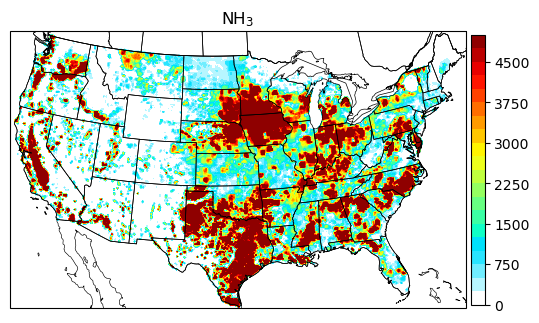

In [22]:
p1 = pd.read_csv('tables/2023_cafo_NH3.csv',delimiter=',')
p2 = pd.read_csv('tables/2023_fert_NH3.csv',delimiter=',')

var = p1 + p2

title = 'NH$_3$'
ix=0
gen_plot(lon, lat, var,title,ix)

In [51]:
import numpy as np

dt0 = np.loadtxt('tables/nh3_fertx.csv',delimiter=',')
dt1 = np.loadtxt('tables/nh3_cafox.csv',delimiter=',')

# dt1 = pd.read_csv('tables/nh3_npoilgasx.csv')
dt2 = np.loadtxt('tables/nh3_npoilgasx.csv',delimiter=',')
dt3 = np.loadtxt('tables/nh3_nonroadx.csv',delimiter=',')
dt4 = np.loadtxt('tables/nh3_nonptx.csv',delimiter=',')
dt5 = np.loadtxt('tables/nh3_ptfire3dx2.csv',delimiter=',')
dt6 = np.loadtxt('tables/nh3_ptagfire3dx.csv',delimiter=',')
dt7 = np.loadtxt('tables/nh3_rwcx.csv',delimiter=',')
dt8 = np.loadtxt('tables/nh3_canmexx.csv',delimiter=',')


dtt = dt0[:] + dt1[:]+ dt2[:] + dt3[:] + dt4[:] + dt7[:] + dt8[:]
dta = dt2[:] + dt3[:] + dt4[:] + dt7[:] + dt8[:]
dtg = dt0[:] + dt1[:]

In [53]:
p1 = np.loadtxt('tables/nh3_cmv_c1c2z.csv',delimiter=',')
p1 = p1[p1 > 0.001]
p2 = np.loadtxt('tables/nh3_cmv_c3z.csv',delimiter=',')
p5 = p2[p2 > 0.001]
p3 = np.loadtxt('tables/nh3_pt_oilgasz.csv',delimiter=',')
p4 = np.loadtxt('tables/nh3_pteguz.csv',delimiter=',')
p4 = p4[p4 > 0.001]
p5 = np.loadtxt('tables/nh3_othpt.csv',delimiter=',')
p5 = p5[p5 > 0.001]

p6 = np.loadtxt('tables/nh3_ptnonipmz.csv',delimiter=',')
p6 = p6[p6 > 0.001]


In [22]:

p1[p1 > 0]
lat0[p1 > 0]

array([9.33832489e-03, 1.49648643e+00, 3.92219275e-01, 4.23462033e-01,
       6.38510990e+00, 2.11492896e+00, 1.81021821e-03, 7.91882038e+00,
       1.59883957e+02, 1.48244827e+02, 1.33856107e-02, 1.56755410e-02,
       8.99203515e-05, 5.42624187e+00, 1.05705537e-01, 1.30146360e+01,
       3.50119324e+01, 2.10323696e+01, 6.84996136e-04, 5.67857362e-03,
       3.28933559e-02, 3.04635167e-02, 1.03007853e-02, 2.92950211e+01,
       1.96184063e+01, 1.61936798e+01, 2.42999842e-04, 2.88877524e-02,
       1.99716640e-04, 5.50866351e-02, 9.22161341e-02, 7.92946994e-01,
       9.45879240e-03, 2.00901818e+00, 4.30546999e-01, 2.51149628e-02,
       2.85178566e+01, 4.14011860e+00, 2.19250679e+01, 1.83054066e+01,
       1.24350143e+02, 9.42796411e-04, 3.40667181e-02, 1.13456821e+01,
       5.00426516e-02, 1.56122580e+01, 6.17852497e+00, 7.32788658e+00,
       1.31224689e+01, 2.93115463e+01, 1.46557732e+01, 7.32788658e+00,
       7.32788658e+00, 1.47395353e+01, 2.50690727e+01, 1.67435154e-01,
      

In [ ]:
import netCDF4
import glob
## PT VARS ##
sec =[ 'cmv_c1c2_12','cmv_c3_12','pt_oilgas','ptegu','othpt','ptnonipm' ]

for ii in sec:
    print(ii)

In [2]:
# biogenic,,np_oilgas,nonroad,nonpt,ptfire3d,ptagfire3d,rwc,canmex
# sec =['np_oilgas','nonroad','nonpt','ptfire3d','ptagfire3d','rwc','canmex' ]
sec =['ptfire3d' ]

for ii in sec:
    print(ii)
    # globals()['nh3_%s' % ii] = 
    globals()['nh3_g_%s' % ii] = xr.open_mfdataset('/mnt/raid/CAMxemis/'+ii+'/emis2d.'+ii+'.2016*.12US2.2016fh_16j.camx', combine='nested',concat_dim="TSTEP",
                    data_vars='minimal', coords='minimal', compat='override',engine='pseudonetcdf',
                    backend_kwargs={'format': 'uamiv'})

ptfire3d


In [3]:
import pandas as pd 

ptfire3da = np.sum(nh3_g_ptfire3d.variables['NH3'][:,0,:,:],axis=0)
ptfire3dx = ptfire3da[:].values
nh3_g_ptfire3d.close()

DF = pd.DataFrame(ptfire3dx)
 
# save the dataframe as a csv file
DF.to_csv("tables/nh3_ptfire3dx2.csv")

In [76]:
import pandas as pd 
DF = pd.DataFrame(npoilgasx)
 
# save the dataframe as a csv file
DF.to_csv("tables/nh3_npoilgasx.csv")

In [3]:
cafox = cafo[:].values
fertx = fert[:].values


In [5]:
import pandas as pd
dc = pd.DataFrame(cafox)
 
# save the dataframe as a csv file
dc.to_csv("tables/nh3_cafox.csv")

dp = pd.DataFrame(fertx)
 
# save the dataframe as a csv file
dp.to_csv("tables/nh3_fertx.csv")

In [18]:
cafoxz = np.sum(cafox)
fertxz = np.sum(fertx)

ag = cafoxz + fertxz
ag

182625980000.0

In [4]:
import netCDF4
filestack = '/mnt/raid/NEIC_2016_V1/IC2016V1_EMIS_PREMERGED_2016fh_PT/2016fh_16j/12us1/cmaq_cb6/cmv_c1c2_12/stack_groups_cmv_c1c2_12_12us1_2016fh_16j.ncf' 
fileinline =  '/mnt/raid/NEIC_2016_V1/IC2016V1_EMIS_PREMERGED_2016fh_PT/2016fh_16j/12us1/cmaq_cb6/cmv_c1c2_12/inln_mole_cmv_c1c2_12_2016*_12us1_cmaq_cb6_2016fh_16j.ncf'


stack = netCDF4.Dataset(filestack)
inline = netCDF4.MFDataset(fileinline)

lat = stack.variables['LATITUDE'][:]#[0,0,:,0]
lon = stack.variables['LONGITUDE'][:]#[0,0,:,0]
# nh3 = inline.variables['NH3'][:] * 3.154e7 # convert to hours
# nh3x = np.mean(nh3,axis=0)

In [6]:
import xarray as xr
dir = '/mnt/raid/NEIC_2016_V1/PSAT_OUTPUT/'
ds = xr.open_dataset(dir+'camx.psat_BIDI.20160701.sa.grd01.nc')
# print(ds)
lon2d = ds['longitude']
lat2d = ds['latitude']

ValueError: 'c' argument has 178 elements, which is inconsistent with 'x' and 'y' with size 60854.

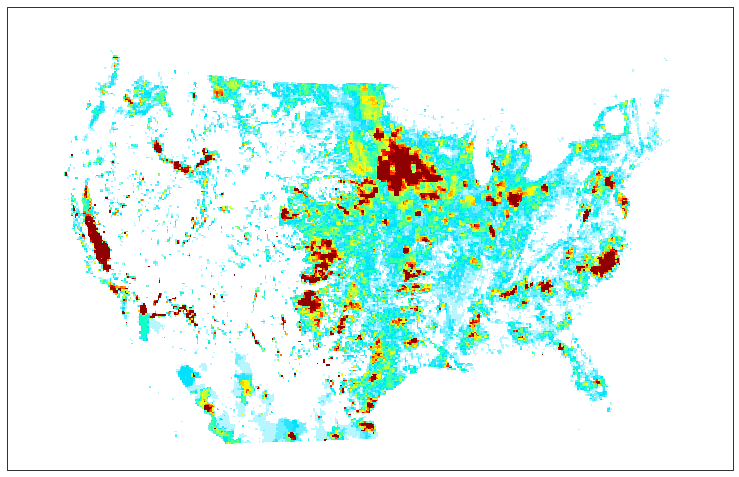

In [56]:
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

fig, ax = plt.subplots(nrows=1, figsize=(13, 20), constrained_layout=True,
                            subplot_kw={'projection': crs})
fig.patch.set_facecolor('white')

# cb9 = fig.colorbar(cf9, ax=ax, orientation='horizontal', shrink=0.74, pad=0.01)
#####

from matplotlib.colors import ListedColormap
WhGrYlBu = ListedColormap(['#ffffff', '#b7f6ff', '#70edff', '#29e4ff', '#00e1fb', '#0fffc6', '#3bffa4', '#68ff82', '#94ff60', '#c0ff3e', '#edff1c', '#fff400', '#ffc700', '#ff9b00', '#ff6e00', '#ff4200', '#ff1500', '#e80000', '#bb0000', '#8f0000'])
#levels = np.arange(0, 135, 5.)
#toplot = np.ma.masked_values(o3[:,:]*1000)
# cb9 = plt.pcolormesh(lon2d[:],lat2d[:],(cafox[:]+fertx[:]), transform=ccrs.PlateCarree(),cmap = WhGrYlBu,vmin=0,vmax=30000000)
# cb9 = plt.pcolormesh(lon2d[:],lat2d[:],((cafox[:]+fertx[:])*17.03/100000), transform=ccrs.PlateCarree(),cmap = WhGrYlBu,vmin=0,vmax=4000)
# cf9 = ax.contourf(lon2d[:],lat2d[:],fertx[:], transform=ccrs.PlateCarree())
cb9 = plt.pcolormesh(lon2d[:],lat2d[:],(dtt[:]*17.03/100000), transform=ccrs.PlateCarree(),cmap = WhGrYlBu,vmin=0,vmax=3000)


ax.scatter(lon0,lat0,c=(p1*17.03/100000)*3600,s=1,cmap=WhGrYlBu, transform=ccrs.PlateCarree(),vmin=0,vmax=3000)   
ax.scatter(lon1,lat1,c=(p2*17.03/100000)*3600,s=1,cmap=WhGrYlBu, transform=ccrs.PlateCarree(),vmin=0,vmax=3000)   
ax.scatter(lon2,lat2,c=(p3*17.03/100000)*3600,s=1,cmap=WhGrYlBu, transform=ccrs.PlateCarree(),vmin=0,vmax=3000)   
# ax.scatter(lon3,lat3,c=(p4*17.03/100000)*3600,s=1,cmap=WhGrYlBu, transform=ccrs.PlateCarree(),vmin=0,vmax=4000)   
ax.scatter(lon4,lat4,c=(p5*17.03/100000)*3600,s=1,cmap=WhGrYlBu, transform=ccrs.PlateCarree(),vmin=0,vmax=3000)   
# ax.scatter(lon5,lat5,c=(p6*17.03/100000)*3600,s=1,cmap=WhGrYlBu, transform=ccrs.PlateCarree(),vmin=0,vmax=4000)   



ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

ax.set_title('No USA agricultural (total - agricultural) NH3 emissions 2016', fontsize=16)
# ax.set_title('Total NH3 emissions 2016', fontsize=16)
ax.set_title('USA agricultural NH3 emissions 2016', fontsize=16)

ax.set_label('(tons/year)')#, size='x-large')
cb9 = fig.colorbar(cb9, ax=ax, orientation='vertical', shrink=0.3,pad=0.01)
cb9.set_label('(tons/year)', size='x-large')
cb9.ax.tick_params(labelsize=16)
ax.set_extent([240., 285., 23.5, 49.])

In [64]:


# var = cafo[:]

# mplot(lon,lat,var)
# Combine 1D latitude and longitudes into a 2D grid of locations
# lon_2d, lat_2d = np.meshgrid(ds['longitude'][0], ds['latitude'][0])

In [66]:
lon2d

<xarray.DataArray 'longitude' (ROW: 246, COL: 396)>
array([[-119.977295, -119.867493, -119.757599, ...,  -74.903076,  -74.792816,
         -74.682587],
       [-120.005707, -119.895752, -119.785767, ...,  -74.875702,  -74.765289,
         -74.654938],
       [-120.034164, -119.924103, -119.81398 , ...,  -74.848236,  -74.737701,
         -74.627228],
       ...,
       [-129.696167, -129.546722, -129.397079, ...,  -65.504578,  -65.353851,
         -65.203308],
       [-129.752441, -129.602783, -129.452927, ...,  -65.450012,  -65.299072,
         -65.148315],
       [-129.808899, -129.659027, -129.508972, ...,  -65.395264,  -65.24411 ,
         -65.09314 ]])
Coordinates:
    longitude  (ROW, COL) float64 -120.0 -119.9 -119.8 ... -65.4 -65.24 -65.09
    latitude   (ROW, COL) float64 22.85 22.87 22.9 22.93 ... 48.28 48.24 48.21
Dimensions without coordinates: ROW, COL
Attributes:
    units:      Degrees east
    long_name:  Longitude
    var_desc:   Longitude degrees east